<a href="https://colab.research.google.com/github/mariajbp/CNF1A86268/blob/main/dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify the bird species that appear on an image based on the use of a Convolutional Neural Network model

### Import libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Model, Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dirs = os.listdir('/content/drive/My Drive/TPCN/dataset')
print(dirs)

Mounted at /content/drive
['.DS_Store', 'train', 'test', 'valid']


In [ ]:
species = os.listdir('/content/drive/My Drive/TPCN/dataset/train')
species.remove('.DS_Store')
print(species)

['ROBIN', 'ALEXANDRINE PARAKEET', 'MOURNING DOVE', 'GILA WOODPECKER', 'BROWN NOODY', 'GUINEAFOWL', 'ROADRUNNER', 'KAKAPO', 'MALEO', 'EVENING GROSBEAK', 'TURQUOISE MOTMOT', 'CHARA DE COLLAR', 'MARABOU STORK', 'RING-NECKED PHEASANT', 'SPOON BILED SANDPIPER', 'BANANAQUIT', 'TEAL DUCK', 'AFRICAN FIREFINCH', 'SNOWY EGRET', 'INDIGO BUNTING', 'FLAMINGO', 'GREAT POTOO', 'COMMON GRACKLE', 'RED HEADED DUCK', 'BARN SWALLOW', 'WHITE CHEEKED TURACO', 'OSTRICH', 'EURASIAN GOLDEN ORIOLE', 'SUPERB STARLING', 'SPLENDID WREN', 'INDIAN PITTA', 'BAR-TAILED GODWIT', 'PELICAN', 'GOLDEN PHEASANT', 'ALBATROSS', 'CHIPPING SPARROW', 'MALLARD DUCK', 'CRESTED AUKLET', 'NORTHERN GANNET', 'AMERICAN PIPIT', 'GOLDEN PIPIT', 'ELEGANT TROGON', 'WILSONS BIRD OF PARADISE', 'SCARLET MACAW', 'AMERICAN BITTERN', 'HELMET VANGA', 'TOUCHAN', 'COMMON HOUSE MARTIN', 'GOLDEN CHLOROPHONIA', 'KILLDEAR', 'MANDRIN DUCK', 'BOBOLINK', 'BAY-BREASTED WARBLER', 'MASKED BOOBY', 'LEARS MACAW', 'OCELLATED TURKEY', 'HORNED GUAN', 'NICOBAR PIG

In [ ]:
print('Unique species:',len(np.unique(species)))

Unique species: 250


In [ ]:
speciesTest = os.listdir('/content/drive/My Drive/TPCN/dataset/test')
speciesTest.remove('.DS_Store')
print(speciesTest)
print('Unique species:',len(np.unique(speciesTest)))

['ROADRUNNER', 'ALEXANDRINE PARAKEET', 'BROWN NOODY', 'GUINEAFOWL', 'KAKAPO', 'MALEO', 'GILA WOODPECKER', 'MOURNING DOVE', 'ROBIN', 'BANANAQUIT', 'SPOON BILED SANDPIPER', 'AFRICAN FIREFINCH', 'SNOWY EGRET', 'CHARA DE COLLAR', 'TEAL DUCK', 'INDIGO BUNTING', 'RING-NECKED PHEASANT', 'EVENING GROSBEAK', 'TURQUOISE MOTMOT', 'MARABOU STORK', 'FLAMINGO', 'COMMON GRACKLE', 'OSTRICH', 'RED HEADED DUCK', 'EURASIAN GOLDEN ORIOLE', 'WHITE CHEEKED TURACO', 'SUPERB STARLING', 'BARN SWALLOW', 'INDIAN PITTA', 'SPLENDID WREN', 'GREAT POTOO', 'BAR-TAILED GODWIT', 'CHIPPING SPARROW', 'PELICAN', 'AMERICAN PIPIT', 'NORTHERN GANNET', 'MALLARD DUCK', 'GOLDEN PIPIT', 'GOLDEN PHEASANT', 'CRESTED AUKLET', 'ALBATROSS', 'ELEGANT TROGON', 'WILSONS BIRD OF PARADISE', 'KILLDEAR', 'COMMON HOUSE MARTIN', 'AMERICAN BITTERN', 'MANDRIN DUCK', 'GOLDEN CHLOROPHONIA', 'TOUCHAN', 'SCARLET MACAW', 'BOBOLINK', 'HELMET VANGA', 'BAY-BREASTED WARBLER', 'MASKED BOOBY', 'ASIAN CRESTED IBIS', 'OCELLATED TURKEY', 'HORNED GUAN', 'BEAR

In [ ]:
speciesValid = os.listdir('/content/drive/My Drive/TPCN/dataset/valid')
speciesValid.remove('.DS_Store')
print(speciesValid)
print('Unique species:',len(np.unique(speciesValid)))

['GILA WOODPECKER', 'ALEXANDRINE PARAKEET', 'KAKAPO', 'MOURNING DOVE', 'MALEO', 'GUINEAFOWL', 'MARABOU STORK', 'BANANAQUIT', 'ROADRUNNER', 'BROWN NOODY', 'ROBIN', 'EVENING GROSBEAK', 'AFRICAN FIREFINCH', 'GREAT POTOO', 'TEAL DUCK', 'FLAMINGO', 'INDIGO BUNTING', 'RING-NECKED PHEASANT', 'SPOON BILED SANDPIPER', 'TURQUOISE MOTMOT', 'SNOWY EGRET', 'CHARA DE COLLAR', 'RED HEADED DUCK', 'EURASIAN GOLDEN ORIOLE', 'OSTRICH', 'SUPERB STARLING', 'BAR-TAILED GODWIT', 'INDIAN PITTA', 'SPLENDID WREN', 'BARN SWALLOW', 'WHITE CHEEKED TURACO', 'COMMON GRACKLE', 'ALBATROSS', 'CRESTED AUKLET', 'NORTHERN GANNET', 'AMERICAN PIPIT', 'CHIPPING SPARROW', 'WILSONS BIRD OF PARADISE', 'PELICAN', 'BOBOLINK', 'GOLDEN PIPIT', 'GOLDEN PHEASANT', 'MALLARD DUCK', 'ELEGANT TROGON', 'AMERICAN BITTERN', 'TOUCHAN', 'HELMET VANGA', 'MASKED BOOBY', 'BAY-BREASTED WARBLER', 'KILLDEAR', 'COMMON HOUSE MARTIN', 'GOLDEN CHLOROPHONIA', 'SCARLET MACAW', 'MANDRIN DUCK', 'LEARS MACAW', 'ASIAN CRESTED IBIS', 'YELLOW HEADED BLACKBIRD'

#### Print one of the training images

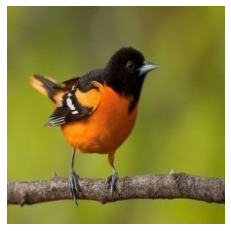

Image size + color channels: (224, 224, 3)


In [ ]:
img = load_img('/content/drive/My Drive/TPCN/dataset/train/BALTIMORE ORIOLE/027.jpg')
plt.imshow(img)
plt.axis("off")
plt.show()

imgData = img_to_array(img)
shape = imgData.shape
print('Image size + color channels:', shape)

## Load and prepare images

In [ ]:
#normalization
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/TPCN/dataset/train', target_size = (224, 224), class_mode='categorical')
train_groups = len(training_set)

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/TPCN/dataset/test', target_size = (224, 224), class_mode='categorical')
test_groups = len(test_set)

valid_set = test_datagen.flow_from_directory('/content/drive/My Drive/TPCN/dataset/valid', target_size = (224, 224), class_mode='categorical')
valid_groups = len(valid_set)

Found 35330 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1270 images belonging to 250 classes.


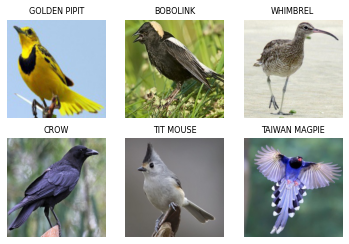

In [ ]:
#create seperate labels for images 
import random

def label_images2(DIR, dataset):
    label = []
    image = []
    j=0
    for i in range (0,30):
        j = random.randint(0, len(dataset.filenames))
        label.append(dataset.filenames[j].split('/')[0])
        image.append(DIR + '/' + dataset.filenames[j])
    return [label,image]

#plot the random images.
y,x = label_images2('/content/drive/My Drive/TPCN/dataset/test', test_set)

for i in range(0,6):
    X = load_img(x[i])
    plt.subplot(2,3,+1 + i)
    plt.axis(False)
    plt.title(y[i], fontsize=8)
    plt.imshow(X)
plt.show()


## Train Model


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape = (224,224, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) #222x222
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #111x111
#model.add(BatchNormalization())
#model.add(Dropout(0.35)) #Doesn't appear to be working in the model summary.

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3))) #109x109
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #54x54
#model.add(BatchNormalization())
#model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) #54x54
model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Flatten()) 
#model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(Dense(250)) #Updated for number of classes
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 111, 111, 64)      0

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime

es = EarlyStopping(monitor='val_loss', patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir = logs,
                          histogram_freq = 1,
                          profile_batch = '500,520')

model.fit_generator(training_set,
                         steps_per_epoch = train_groups, 
                         epochs = 50, # play with number of epochs and benchmark results
                         callbacks = [mc, tensorboard],
                         validation_data = test_set,
                         validation_steps = valid_groups,
                         workers = 4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1105/1105 [==============================] - 197s 178ms/step - loss: 5.5044 - accuracy: 0.0085 - val_loss: 5.5404 - val_accuracy: 0.0040
Epoch 2/50
1105/1105 [==============================] - 200s 181ms/step - loss: 5.5044 - accuracy: 0.0085 - val_loss: 5.5378 - val_accuracy: 0.0040
Epoch 3/50
1105/1105 [==============================] - 200s 181ms/step - loss: 5.5042 - accuracy: 0.0085 - val_loss: 5.5369 - val_accuracy: 0.0040
Epoch 4/50
1105/1105 [==============================] - 200s 181ms/step - loss: 5.5042 - accuracy: 0.0085 - val_loss: 5.5359 - val_accuracy: 0.0040
Epoch 5/50
1105/1105 [==============================] - 200s 180ms/step - loss: 5.5041 - accuracy: 0.0085 - val_loss: 5.5382 - val_accuracy: 0.0040
Epoch 6/50
1105/1105 [==============================] - 199s 180ms/step - loss: 5.5040 - accuracy: 0.0085 - val_loss: 5.5390 - val_accuracy: 0.0040
Epoch 7/50
1105/1105 [==============================] - 199s 180ms/step - loss: 5.5039 - accuracy: 0.0085 - val_

In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate against test data.
scores = model.evaluate(test_set)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

NameError: ignored